# Lab 06 - Plotting

## Prelab

Before starting your Jupyter notebook, read through this entire document, then create a pseudocode outline of what your program will do.   Use separate the markdown sections that describe what each of sections of code will do. Describe what the plots will look like in the markdown blocks.

## Lab

Download the csv data file available at the NOAA website here: [https://tidesandcurrents.noaa.gov/waterlevels.html?id=9439040](https://tidesandcurrents.noaa.gov/waterlevels.html?id=9439040) The csv data file contains water level data points gathered from the NOAA tide station in Astoria, OR on April 15, 2018 over a 24-hour period.

Construct the ```url``` from the list of strings below. Parts of the url can be concatinated using the plus sign ```+```.

Once the ```url``` is constructed, use Panda's ```pd.read_csv()``` function to read the data into a Pandas _dataframe_ called ```df```.

In [12]:
# base url
h ='https://tidesandcurrents.noaa.gov/api/datagetter?'
# seperator = &
s = 'station=9439040'
b = '&begin_date=20180415'
r = '&range=24'
p = '&product=water_level'
d = '&datum=STND'
u = '&units=metric'
t = '&time_zone=lst'
f = '&format=csv'

url = h + s + b + r + p + d + u + t + f
url

'https://tidesandcurrents.noaa.gov/api/datagetter?station=9439040&begin_date=20180415&range=24&product=water_level&datum=STND&units=metric&time_zone=lst&format=csv'

In [13]:
import pandas as pd
df = pd.read_csv(url)
df.head()
df.columns

Index(['Date Time', ' Water Level', ' Sigma', ' O', ' F', ' R', ' L',
       ' Quality '],
      dtype='object')

The first column of the Pandas dataframe represents the date and time when the water level was measured.  For example, in the second row of data contains a value of ```2018-04-12 00:06```.  That value in the ```Date Time``` column means April 15th, 2018 at 12:06am. 

Remove the last 6 columns of the dataframe so that there on only two first columns in the dataframe, ```Date Time``` and ```Water Level```.

```python
df.drop(['Sigma', 'O','F','R','L','Quality'], axis=1, inplace=True)
```

In [14]:
df.drop([' Sigma', ' O', ' F', ' R', ' L',' Quality '], axis=1, inplace=True)
df.columns = ['date_time', 'water_level']
df.head()

,date_time,water_level
0,2018-04-15 00:00,3.478
1,2018-04-15 00:06,3.502
2,2018-04-15 00:12,3.508
3,2018-04-15 00:18,3.522
4,2018-04-15 00:24,3.526


The data was recorded every 6 minutes, which is every 10th or 0.1 hours. Construct a NumPy array starting at zero hours, ending at 24 hours in increments of 0.1 hours. Save this NumPy array to a variable called ```hours```.

```python
hours = np.arange(0,24.1,0.1)
```

In [15]:
import numpy as np
hours = np.arange(0,24.1,0.1)

### Single Line Plot

Plot the water level vs time (hours) on a set of axis. Label the x-axis as time in units of hours. Label the y-axis as water level in units of meters. Include a title on the plot

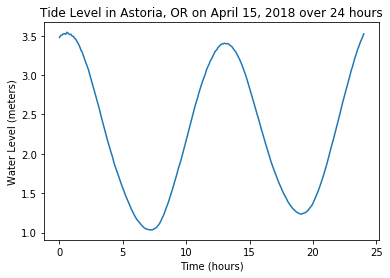

In [19]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(hours,df['water_level'])
ax.set_xlabel('Time (hours)')
ax.set_ylabel('Water Level (meters)')
ax.set_title('Tide Level in Astoria, OR on April 15, 2018 over 24 hours')
plt.show()

### 4 subplots

You will create a Matplotlib Figure 1 that will end up looking like the Figure 1 in this document below:

![Figure_1](#)

Use the ```pd.find()``` function to save the precipitation data (number of inches only) exclusively for days in the year 2013 to a vector NumPy array called ```precip_2013```.  Use the plt.subplots() method to plot the data in the first slot in Figure
1.  Label its title, and its y-axis as you see pictured in this document's Figure 1.  Include the grid lines as well.  Allow b = '&begin_date=20180415'Python to decide where your grid lines and axis tick marks should be.\\

```
b = '&begin_date=20180415'
```

You can aquire the data data for a different date by modifying the last two numbers in the string ```b = '&begin_date=20180415'```. For example, if we change the string to ```b = '&begin_date=20180416'```, we will aquire the data for April 16, 2018.

Find the title level data for four different days: April 15, April 16, April 17 and April 18. Plot all four days as the same figure as four subplots.

b = '&begin_date=201804156'

In [22]:
b = '&begin_date=20180416'
url = h + s + b + r + p + d + u + t + f
url

'https://tidesandcurrents.noaa.gov/api/datagetter?station=9439040&begin_date=20180416&range=24&product=water_level&datum=STND&units=metric&time_zone=lst&format=csv'

In [23]:
import pandas as pd
df16 = pd.read_csv(url)
df16.head()
df16.columns

Index(['Date Time', ' Water Level', ' Sigma', ' O', ' F', ' R', ' L',
       ' Quality '],
      dtype='object')

In [24]:
df16.drop([' Sigma', ' O', ' F', ' R', ' L',' Quality '], axis=1, inplace=True)
df16.columns = ['date_time', 'water_level']
df16.head()

,date_time,water_level
0,2018-04-16 00:00,3.523
1,2018-04-16 00:06,3.562
2,2018-04-16 00:12,3.591
3,2018-04-16 00:18,3.619
4,2018-04-16 00:24,3.647


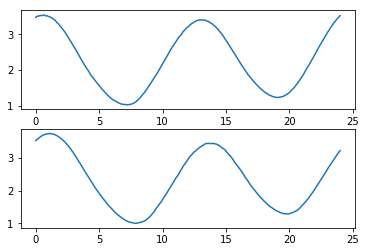

In [26]:
import matplotlib.pyplot as plt
fig, (ax1,ax2) = plt.subplots(2,1)
ax1.plot(hours,df['water_level'])
ax2.plot(hours,df16['water_level'])
plt.show()

### y-y plot

Use the ```pd.find()``` command to save some of the snow depth data into a NumPy array called ```winter13_14_sd```.  Remember that the column headers were in the Excel file.  Refer to that file, if need be, to see which column was for snow depth.  Remember that we deleted the date column and added 3 date columns in its place.  Your data set should only include the data from the first day of November 2013 to the last day of February 2014.  This will probably be the most difficult part of this assignment.

Do the same to select the same days' snow fallen data and save it into a NumPy array called ```winter13_14_sf```.  Use the ```ptl.plotyy()``` command to plot both sets of data on the same graph, but with different y-axes.  

Notice the figure has a different vertical axis on the left from that on its right.  Let Matplotlib choose your axis limits and line colors.  Be sure to include the grid lines, x-axis label, y-axis label, title, and legend you see pictured below.

![y-y plot](images/fig2.png)

### Histogram

Create a Matplotlib Figure 3 that looks like this document's Figure 3.

Create a plot just like it from your ```winter13_14_sf``` NumPy array.  Match all of its labels etc.  20 bins were used to create this histogram.

![Histogram](images/fig3.png)

## Deliverables

Each student’s submission for the lab must be a single Jupyter Notebook. The Jupyter Notebook must contain markdown cells that explain the code, code cells that contain the code, and output cells that contain a total of 3 plots. The three plots produced by the code cells in the notebook should be: 

 * A plot that contains four sub-plots that shows level verses time

 * A y-y plot that shows snow level on one axis and rainfall on another axis

 * A histogram

Make sure to run all the cells in the Jupyter notebook before submitting the file. Upload your **_lab4.ipynb_** file to the Lab 4 drop box in D2L. 